# Project: Investigate a TMDb movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Question1a">Research Question 1-a</a></li>
<li><a href="#Question1b">Research Question 1-b</a></li>
<li><a href="#Question2a">Research Question 2-a</a></li>
<li><a href="#Question2b">Research Question 2-b</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I explore the TMDb movie dataset. This dataset contains information about over 10,000 movies collected from The Movie Database (TMDb).

In particular, I am interested in analyzing:
+ historical trends of budget and revenue sizes
+ seasonal patterns of budget and revenue sizes
+ relations between genres and popularity
+ relations between genres and profitability

For details about the variables I used in each analysis, please see the Exploratory Data Analysis section.

In [390]:
# import packages to use
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [391]:
# (this is optional) reset the setting that is applied later in this notebook 
pd.reset_option('display.max_columns')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [392]:
# Load TMDb movie data and print out a few lines
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [393]:
# Some columns between 'tagline' and 'overview' are not displayed. Change pandas settings to display all columns
pd.set_option('display.max_columns', None)
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [394]:
# check data types, number of observations, and whether there is any missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

So this dataset contains 10866 movies in total.


There are many variables that I don't think will be useful in the analysis. The first step of data cleaning is to drop these unnecessary columns.

### Data Cleaning: Drop unnecessary columns and change data formats

In [395]:
# display all column names
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [396]:
# drop columns that I don't think I will use in the analysis
df.drop(['imdb_id', 'budget', 'revenue', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies'], axis=1, inplace=True)
df.head(3)

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


Now all columns fit within the width of a cell! Sweet. But I don't like that 'budget_adj' and 'revenue_adj' are displayed in a scientific notation like 'e+08' as it is not very intuitive.


I referred to the page below and decided to change the data type from float to integer to change the display format:
https://stackoverflow.com/questions/49909710/suppress-scientific-format-in-a-dataframe-column

In [397]:
# Change the data type of these 2 variables from float to integer
df[['budget_adj', 'revenue_adj']] = df[['budget_adj', 'revenue_adj']].astype('int64')
df[['budget_adj', 'revenue_adj']].dtypes

budget_adj     int64
revenue_adj    int64
dtype: object

In [398]:
# check if 'budget_adj' and 'revenue_adj' are now displayed as I want
df.head(3)

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939,1392445892
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939,348161292
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,101199955,271619025


This looks neat, except 2 things:

(1) I am interested in using 'genres' values, but currently 'genres' contains multiple categories which are separated with a separator "|". I want to have them in a long-data format, where each row corresponds to a single movie genre.

(2) I am also curious about seasonal trends in the movie industry. To analyze it, I'd most benefit if I create a new column for release month. To get that, I need to use the values of 'release_data' column.


### Additional Data Manipulation (1): Create another dataframe with genres split into multiple rows

In [399]:
# revisit the data summary to see if 'genres' has any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
id                10866 non-null int64
popularity        10866 non-null float64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null int64
revenue_adj       10866 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 933.9+ KB


So there are 23 (10866 minus 10843) records where genres are missing.

In [400]:
# Look into those 23 rows with missing genres 
df[df['genres'].isnull()]

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,0.244648,Belli di papÃ,100,NaN,10/29/15,21,6.1,2015,0,0
620,361043,0.129696,All Hallows' Eve 2,90,NaN,10/6/15,13,5.0,2015,0,0
997,287663,0.330431,Star Wars Rebels: Spark of Rebellion,44,NaN,10/3/14,13,6.8,2014,0,0
1712,21634,0.302095,Prayers for Bobby,88,NaN,2/27/09,57,7.4,2009,0,0
1897,40534,0.020701,Jonas Brothers: The Concert Experience,76,NaN,2/27/09,11,7.0,2009,0,0
2370,127717,0.081892,Freshman Father,0,NaN,6/5/10,12,5.8,2010,0,0
2376,315620,0.068411,Doctor Who: A Christmas Carol,62,NaN,12/25/10,11,7.7,2010,0,0
2853,57892,0.130018,Vizontele,110,NaN,2/2/01,12,7.2,2001,0,0
3279,54330,0.145331,ì•„ê¸°ì™€ ë‚˜,96,NaN,8/13/08,11,6.1,2008,0,0
4547,123024,0.520520,London 2012 Olympic Opening Ceremony: Isles of...,220,NaN,7/27/12,12,8.3,2012,0,0


It doesn't seem possible to accurately impute genres based on the movie titles. Since there are only 23 records out of 10866, it seems reasonable (at least it is safe) to drop those 23 rows.

In [401]:
# drop rows with missing genres
df_g0 = df.dropna(axis=0, subset=['genres'])

# check how many records are now in the dataset (there should be 10843 records)
df_g0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 11 columns):
id                10843 non-null int64
popularity        10843 non-null float64
original_title    10843 non-null object
runtime           10843 non-null int64
genres            10843 non-null object
release_date      10843 non-null object
vote_count        10843 non-null int64
vote_average      10843 non-null float64
release_year      10843 non-null int64
budget_adj        10843 non-null int64
revenue_adj       10843 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 1016.5+ KB


Next, I want to split multiple genres stored in a single cell in the 'genre' column with separator "|" and store them in separate rows., just like we did in the fuel economy data example... But I had an issue with splitting a column using index. 

So I took an alternative approach as follows: 

(1) split the 'genres' column into multiple columns;

(2) create multiple dataframes each of which contains only one of the new genre columns with the same set of the other variables;

(3) append the newly created dataframes; and

(4) drop the rows with missing genre.

In [402]:
# check how many categories of movie genres at maximum are stored in the "genres" column
len(df_g0['genres'].str.split("|", expand=True).columns)

5

In [403]:
# split 'genres' column and store them into newly created 5 columns
genre_split = df_g0['genres'].str.split("|", expand=True)
genre_split.rename(columns={0:'genre1', 1:'genre2', 2:'genre3', 3:'genre4', 4:'genre5'}, inplace=True)
df_g0[['genre1','genre2','genre3','genre4','genre5']] = genre_split
df_g0.head(3)

/home/mari/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre1,genre2,genre3,genre4,genre5
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939,1392445892,Action,Adventure,Science Fiction,Thriller,None
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939,348161292,Action,Adventure,Science Fiction,Thriller,None
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,101199955,271619025,Adventure,Science Fiction,Thriller,None,None


In [404]:
# Copy the dataframe and save it as a new data frame with keeping only one of the 5 new genre columns
df_g1 = df_g0.drop(columns=['genre2','genre3','genre4','genre5'])
df_g1.head(2)

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre1
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939,1392445892,Action
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939,348161292,Action


In [405]:
# repeat the same process to create 5 new dataframes in total, 
#   each of which contains only one of the newly created 5 genre column
df_g2 = df_g0.drop(columns=['genre1','genre3','genre4','genre5'])
df_g3 = df_g0.drop(columns=['genre1','genre2','genre4','genre5'])
df_g4 = df_g0.drop(columns=['genre1','genre2','genre3','genre5'])
df_g5 = df_g0.drop(columns=['genre1','genre2','genre3','genre4'])

In [406]:
# rename the 'genreN' column as 'genre'
df_g1.rename(columns={'genre1':'genre'}, inplace=True)
df_g1.head(2)

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939,1392445892,Action
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939,348161292,Action


In [407]:
# repeat the same process for the other 4 dataframes
df_g2.rename(columns={'genre2':'genre'}, inplace=True)
df_g3.rename(columns={'genre3':'genre'}, inplace=True)
df_g4.rename(columns={'genre4':'genre'}, inplace=True)
df_g5.rename(columns={'genre5':'genre'}, inplace=True)

In [408]:
# combine the 5 dataframes and create one new dataframe
df_genres = df_g1.append(df_g2).append(df_g3).append(df_g4).append(df_g5)
df_genres.head(3)

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939,1392445892,Action
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939,348161292,Action
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,101199955,271619025,Adventure


In [409]:
# do quick sanity check: df_genres now should have 54215 (=10843*5) rows
df_genres.shape

(54215, 12)

In [410]:
# currently the new dataframe contains rows with missing 'genre' value. Drop these rows
df_genres.dropna(axis=0, subset=['genre'], inplace=True)
df_genres.shape

(26960, 12)

In [411]:
# sort based on index to check the results of column-splitting
df_genres = df_genres.sort_index()
df_genres.head(20)

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939,1392445892,Action
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939,1392445892,Science Fiction
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939,1392445892,Thriller
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939,1392445892,Adventure
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939,348161292,Thriller
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939,348161292,Action
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939,348161292,Science Fiction
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939,348161292,Adventure
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,101199955,271619025,Science Fiction
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,101199955,271619025,Thriller


Great! Now, there are 4 rows for "Jurassic World" and each row has different genre in the 'genre' column. 



Next, going back to the other dataframe, add a new column that contains release month values.

### Additional Data Manipulation (2): Create a new "release_month" column 

In [412]:
# split the 'release_date' value at the separator "/" into month, day, and year and store them in new columns
df[['release_month','rls_day','rls_year']] = df['release_date'].str.split("/", expand=True).astype('int64')
df.head(3)

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,rls_day,rls_year
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939,1392445892,6,9,15
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939,348161292,5,13,15
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,101199955,271619025,3,18,15


In [413]:
# I don't need release day and release year (the latter already exists). Drop them
df.drop(columns=['rls_day','rls_year'], inplace=True)
df.head(3)

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939,1392445892,6
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939,348161292,5
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,101199955,271619025,3


In [414]:
# one final sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
id                10866 non-null int64
popularity        10866 non-null float64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null int64
revenue_adj       10866 non-null int64
release_month     10866 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 1018.8+ KB


Finally, everything looks ready for analyses!


<a id='eda'></a>
## Exploratory Data Analysis

In this section, I explore the following relationships (variables I used in each analysis are in parentheses): 

1: Budget and revenue adjusted in 2010 dollars (*budget_adj*, *revenue_adj*)
-  1-a: yearly pattern in budget and revenue sizes (*release_year*)
-  1-b: seasonal pattern in budget and revenue sizes (*release_date*)

2: Genre (*genres*)
-  2-a: Does popularity differ by genre? (*popularity*, *vote_average*)
-  2-b: How much does profitability differ by genre? (*budget_adj*, *revenue_adj*)


<a id='Question1a'></a>
### Research Question 1-a: Is there any historical pattern in budget and revenue sizes?

In [415]:
# first, let's look into the summary statistics of budget_adj and revenue_adj
df[['budget_adj','revenue_adj']].describe()

,budget_adj,revenue_adj
count,1.086600e+04,1.086600e+04
mean,1.755104e+07,5.136436e+07
std,3.430616e+07,1.446325e+08
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,2.085325e+07,3.369710e+07
max,4.250000e+08,2.827124e+09


The median value for both is ZERO! How many records in total actually have 0 budget or revenue values?

In [416]:
# count how many records have 0 budget_adj values
df[df.budget_adj==0].shape

(5698, 12)

In [417]:
# count how many records have 0 revenue_adj values
df[df.revenue_adj==0].shape

(6016, 12)

The number of records in df is 10866, so more than half of the movies in df have 0 dollar of budgets and/or revenues.

It seems unlikely that any movie was made with 0 budget, so my guess is that for those movies, the budget data was not available and 0 was put as a place holder. It might also be the case for revenue, depending on its definition (it might be being used as synonum of sales, rather than sales minus costs. If the latter, 0 revenue would be possible).

Now, let's look into the distribution of these values in each year:

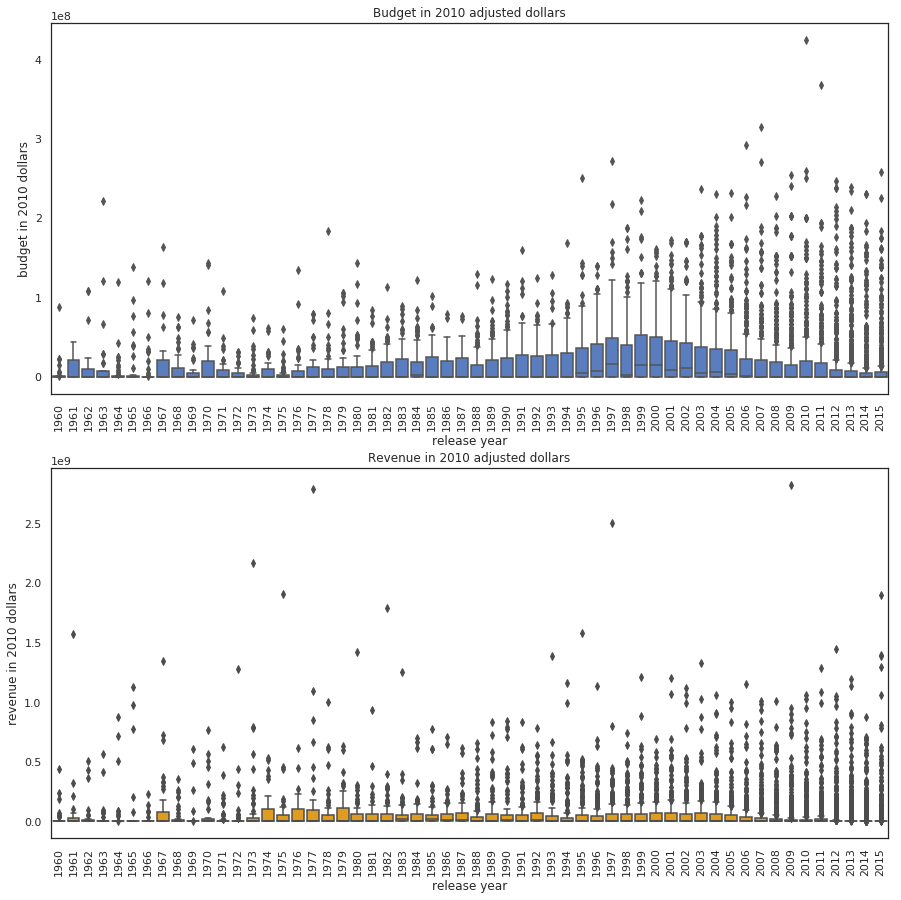

In [418]:
# create box plot for budget_adj and revenue_adj by year
sns.set(rc={'figure.figsize':(15,15)}, style="white", palette="muted")

plt.subplot(2,1,1)
sns.boxplot(x="release_year", y="budget_adj", data=df, color="b")
plt.xticks(rotation=90)
plt.title('Budget in 2010 adjusted dollars')
plt.xlabel('release year')
plt.ylabel('budget in 2010 dollars')

plt.subplot(2,1,2)
sns.boxplot(x="release_year", y="revenue_adj", data=df, color="orange")
plt.xticks(rotation=90)
plt.title('Revenue in 2010 adjusted dollars')
plt.xlabel('release year')
plt.ylabel('revenue in 2010 dollars');

As we can see, there are a lot of outliers each year in both plots.

Now let's zoom in and see how much the highest budgets have been. 

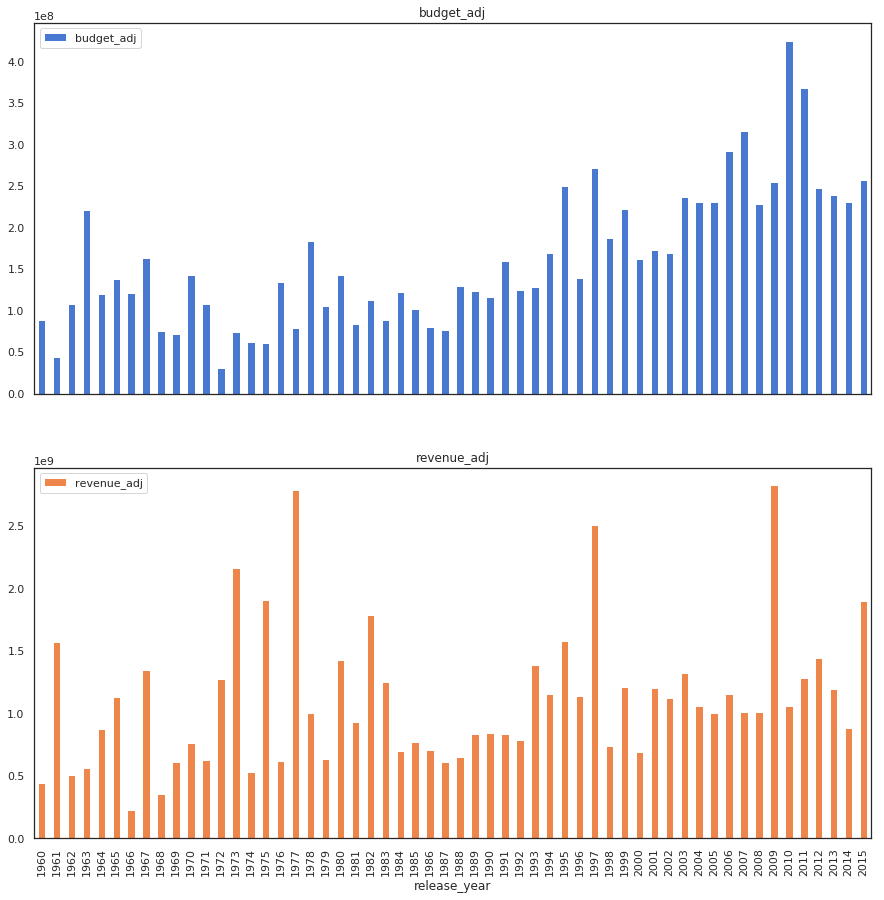

In [419]:
# create bar charts for the maximum value of budget and revenue by year
df.groupby('release_year')[['budget_adj', 'revenue_adj']].max().plot.bar(subplots=True, figsize=(15,15));

Here are some observations:
+ The highest budgets of the year have been increased steadily since 1970s.
+ The maximum revenues have been around 1 billion (1e9) adjusted dollars since early 1990s, without some exceptions.
+ Unlike the budgets, there are some spikes in revenues in 1970s, such as 2.5B in 1977.

I also want to investigate historical patterns of *average* budgets and revenues by year. I am not 100% sure about how I should treat 0 dollar budget movies in this case in calculating mean, so I create a set of charts with all movies included and the other with only movies with budgets larger than 0.  

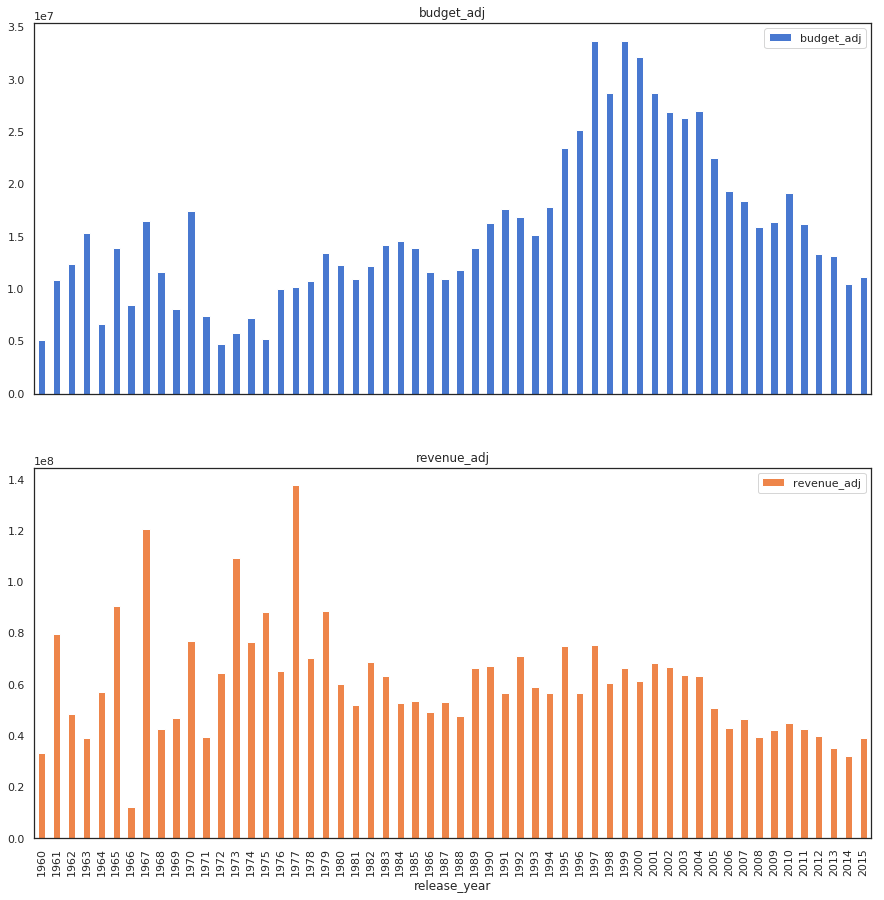

In [420]:
# create bar charts of average budget and revenue by year 
df.groupby('release_year')[['budget_adj', 'revenue_adj']].mean().plot.bar(subplots=True, figsize=(15,15));

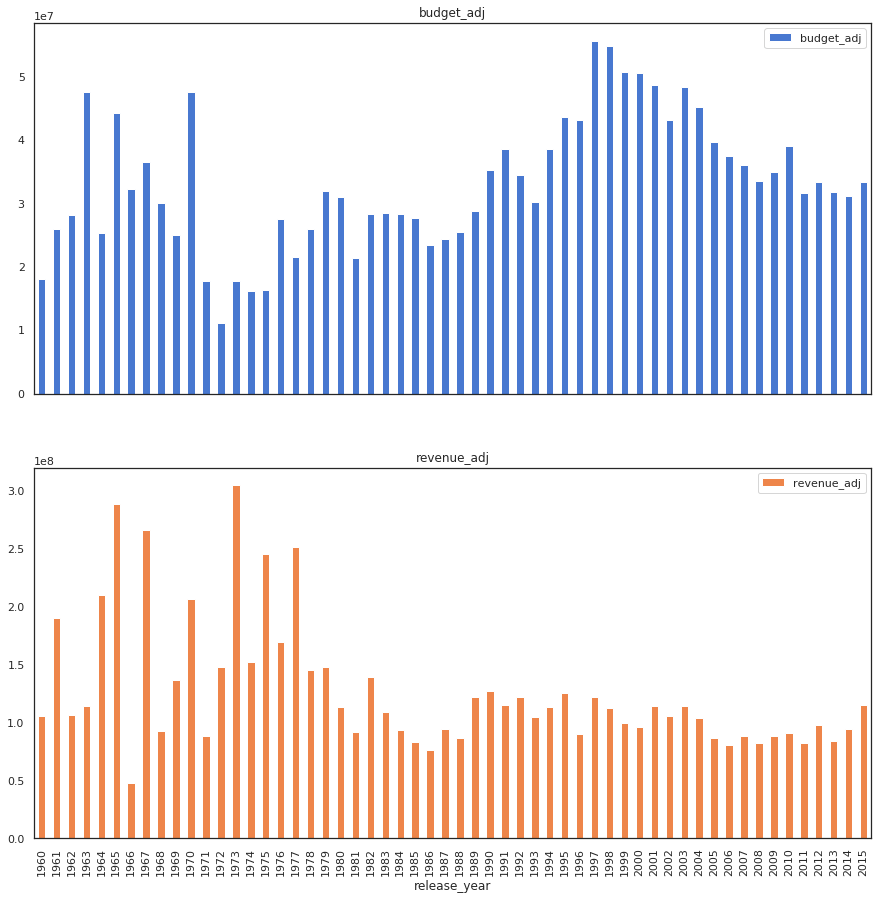

In [421]:
# create bar charts of average budget and revenue for movies with more than 0 budget by year 
df.query('budget_adj>0').groupby('release_year')[['budget_adj', 'revenue_adj']].mean().plot.bar(subplots=True, figsize=(15,15));

The overall trends remain the same regardless of including 0-budget movies in the average calculation:
+ On average, the budget size already hit the peak in 1997 and has been in decline since.
+ Before 1997, the average budget had increased steadily since early 70s.
+ In terms of revenues, there were years in 60s and 70s when the average revenue exceeded 200 million adjusted dollars.
+ Since the late 70s, the average revenue has remained roughly around 100 million adjusted dollars over the years.

So far, I have explored the changes in budgets and revenues by year. But I also thought there should be seasonal patterns with these changes. The revenues might be higher during summer when kids are on long vacation, or it might be higher during winter when people prefer indoor leisure. And movie productions might allocate larger budgets for the movies that were scheduled to be released during the high seasons. 

<a id='Question1b'></a>
### Research Question 1-b: Is there any seasonal pattern in budget and revenue sizes?

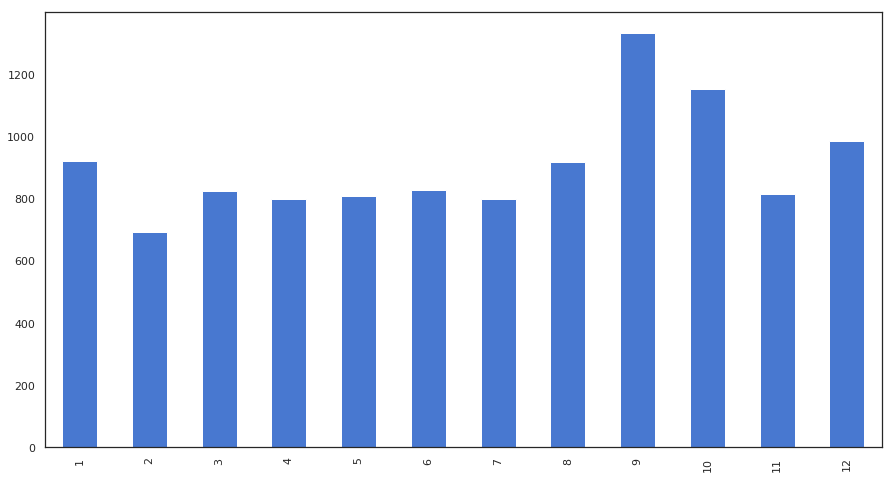

In [422]:
# first, count how many movies in the dataset were released in each month
df['release_month'].value_counts().reindex(np.arange(1,13)).plot(kind='bar', figsize=(15,8));

In [423]:
# quick overview of summary statistics by month
df.groupby('release_month').mean()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
release_month,,,,,,,,
1,57024.734494,0.460574,95.314472,118.260065,5.870620,2002.830250,7.801837e+06,1.895000e+07
2,53702.903039,0.589931,101.386397,176.756874,5.918524,2002.011577,1.557539e+07,3.393971e+07
3,66374.047388,0.642752,101.325638,221.985419,5.926974,2001.414338,1.685065e+07,4.944458e+07
4,66331.592221,0.562475,99.922208,190.067754,5.875533,2002.355082,1.543173e+07,3.971626e+07
5,59997.241038,0.749997,104.715698,300.019778,5.967985,2001.365884,2.305737e+07,7.624643e+07
6,59957.187424,0.800755,102.338573,325.535671,6.012092,1998.627570,2.726680e+07,9.759761e+07
7,66734.848561,0.747678,101.876095,298.519399,5.928411,2000.279099,2.292387e+07,7.329208e+07
8,74186.415033,0.584363,98.458606,161.847495,5.840087,2001.934641,1.433110e+07,3.546830e+07
9,74583.489106,0.564820,104.765590,160.182569,6.068069,2003.954170,1.101012e+07,2.325910e+07


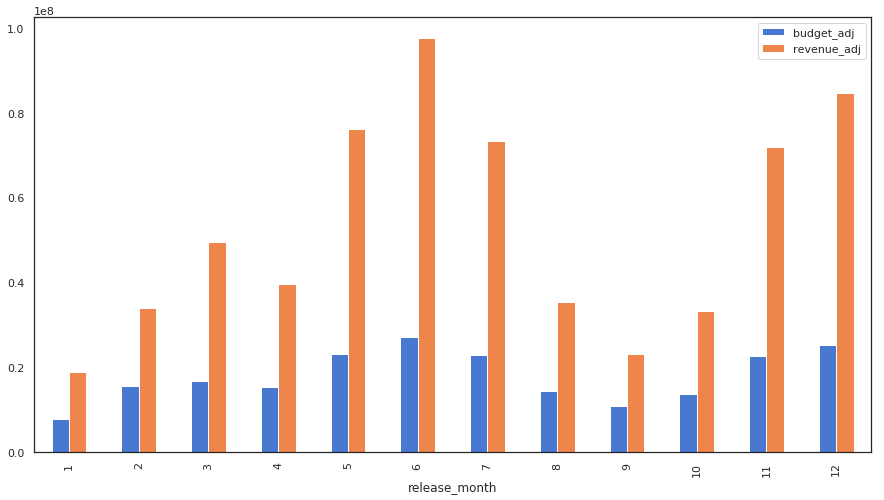

In [424]:
# create bar chart of average budget and revenue of all movies by month
df.groupby('release_month')[['budget_adj','revenue_adj']].mean().plot(kind='bar', figsize=(15,8));

It appears that there are 2 peak seasons: May to July and November to December. This trend aligns with when people take long-ish vacations (e.g. summer, Thanksgiving, Christmas).

<a id='Question2a'></a>
### Research Question 2-a: Does popularity differ by genre?
In Question 1, I have focused on yearly and monthly trends of budgets and revenues. In the following section, I explore the data by genre categories.  

In [425]:
# quick overview of summary statistics
df_genres.groupby('genre').mean()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
genre,,,,,,,,
Action,52707.143396,0.926136,104.912369,392.875052,5.787421,2000.060377,3.295887e+07,9.172020e+07
Adventure,48847.743712,1.154259,106.173351,513.125085,5.940585,1999.388851,4.393734e+07,1.416752e+08
Animation,68162.277539,0.852182,68.181688,303.000000,6.403147,2003.995708,2.529535e+07,8.525613e+07
Comedy,53568.424993,0.592607,96.745057,176.436330,5.905167,2000.816240,1.592031e+07,4.789700e+07
Crime,47714.852399,0.744821,106.906273,278.680443,6.124059,1999.498893,2.153976e+07,5.659533e+07
Documentary,126915.646154,0.181432,102.651923,35.105769,6.908462,2008.313462,6.232226e+05,2.258210e+06
Drama,61190.542533,0.591496,110.474270,182.529301,6.165301,2000.931107,1.485672e+07,4.040885e+07
Family,50493.664500,0.786668,89.603574,272.320877,5.997563,2000.774167,2.692389e+07,8.773671e+07
Fantasy,46632.173581,0.992840,100.736900,420.741266,5.863537,2000.292576,3.742931e+07,1.112342e+08


I am curious about which genre is more popular and/or has higher reviews than others. In this dataset, there are 2 indices for measuring how much viewers liked a movie: *popularity* and *vote_average*. How do they differ, to begin with?

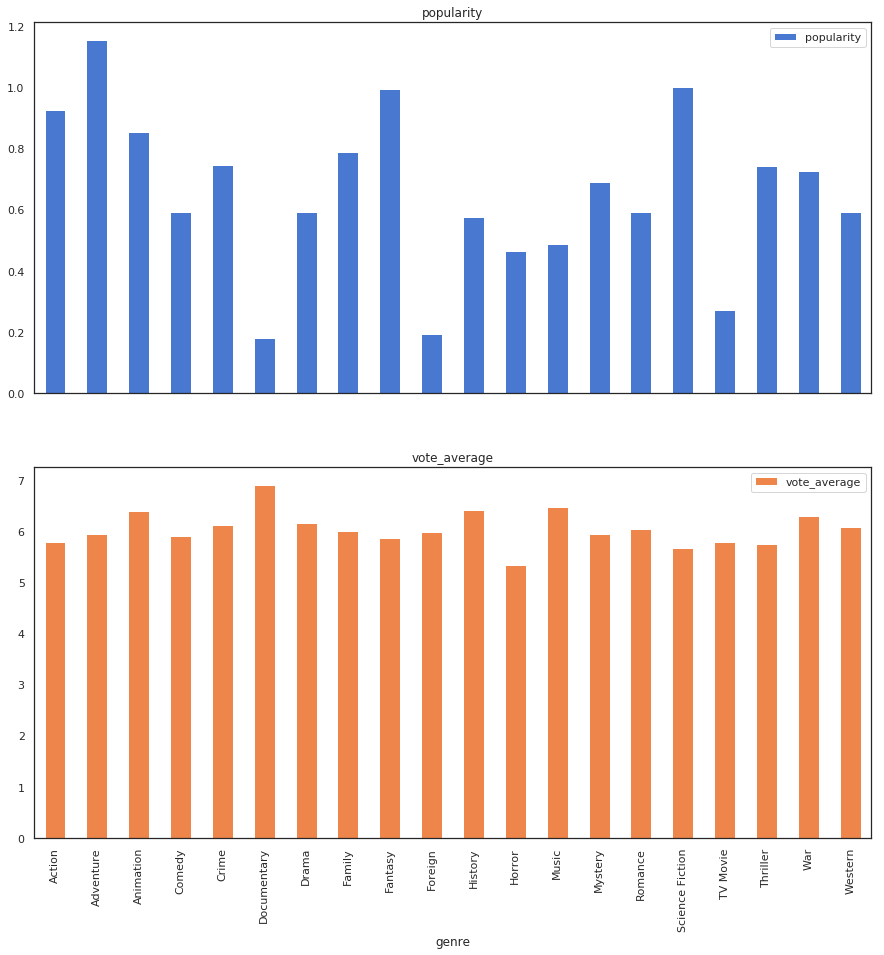

In [426]:
# create bar charts of popularity and vote_average by genre
df_genres.groupby('genre')[['popularity','vote_average']].mean().plot(kind='bar', subplots=True, figsize=(15,15));

We see some interesting points: 
+ Adventure, fantasy, and sci-fi have the highest popularity score.  Documentary, foreign, and TV movie are the lowest. 
+ Popularity varies a lot between genres, while vote_average doesn't differ by genre as much as popularity does. 
+ The genres with high popularity don't always have high vote_average, and vice versa. Most notably, documentary has the lowest popularity among all yet the highest vote_average.

This difference might be due to the definition of these indices. I couldn't find the definitions in the TMDb website, but my guess is that popularity is based on how many people have recently watched or accessed the page of a movie, hence newer movies tend to have higher popularity. Let's check if this assumption is accurate:

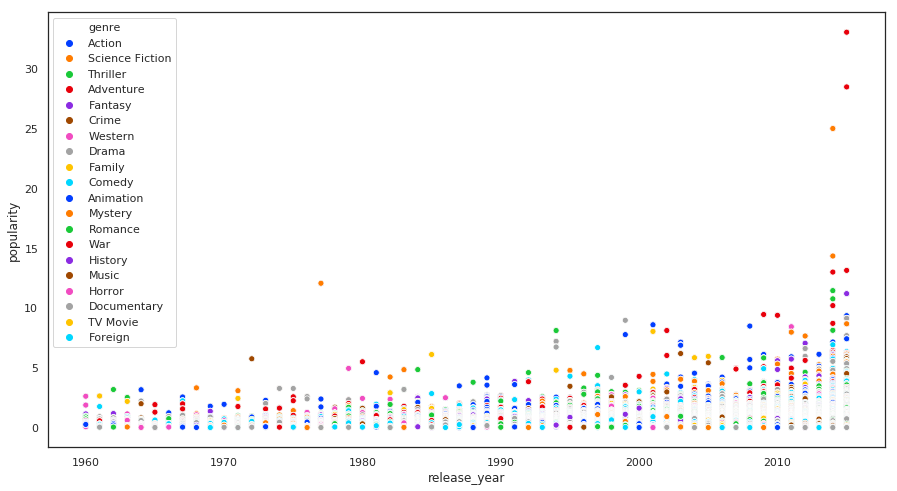

In [427]:
# map scatter plot with release year in x-axis and popularity in y-axis
sns.set(rc={'figure.figsize':(15,8)}, style="white")
sns.scatterplot(x="release_year", y="popularity", data=df_genres, hue="genre", palette="bright");

Although we can see many newest movies with popularity value of 0, the movies with the high popularity (say popularity score above 10) are mostly in 2014 and 2015. So popularity is related to recent release.

I admit that there are too many genre categories to map in different colors, but now we know at least why adventure has the highest popularity score by finding a red dot in the top right of the scatter plot.

<a id='Question2b'></a>
### Research Question 2-b: How much does profitability differ by genre?
In this last section, I explore which genre is on average more profitable than others. We have already learned that adventure, fantasy, and sci-fi have the highest popularity score. But these genres can be the most costly to make a movie - movies in these fields heavily use special effects that require cutting-edge technologies. 

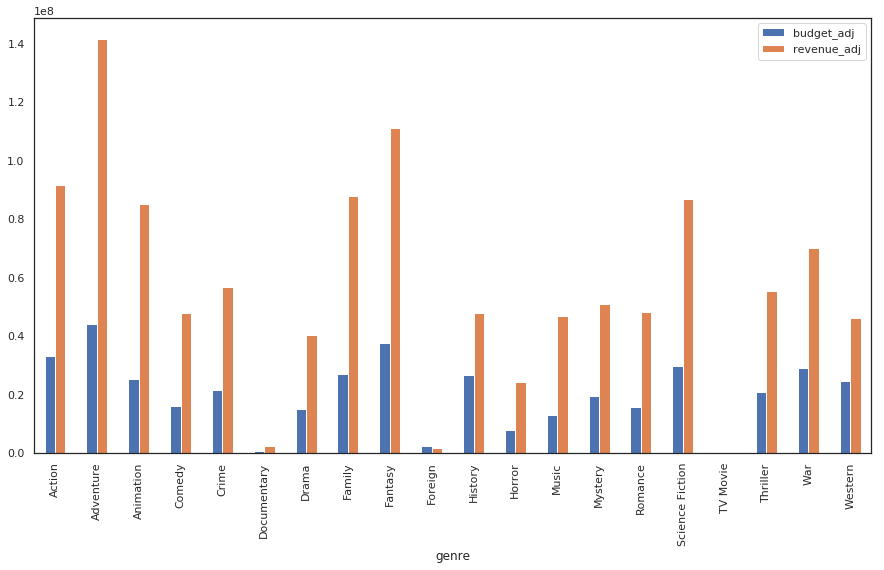

In [428]:
# plot average budget and revenue of all movies by genre
df_genres.groupby('genre')[['budget_adj','revenue_adj']].mean().plot(kind='bar', figsize=(15,8));

Oh, wow. Documentary, foreign, and TV movie, the genres with the lowest popularity, are actually the smallest in terms of budget and revenue sizes! The gap against the 3 most popular genres (adventure, fantasy, and sci-fi) is almost brutal.
What about profitability? Adventure, fantasy, and sci-fi have highest average revenues, but also (as I imagined) highest average budgets. Maybe, when it comes to return on investment, these are not the most profitable genres. Let's look into this:

In [429]:
# use only records with budget more than 0 in order to use budget value as a denominator
df_genres2 = df_genres[df_genres.budget_adj > 0]

# calculate profitability by dividig revenue by budget and name the variable ROI
ROI = df_genres2['revenue_adj'] / df_genres2['budget_adj']
df_genres2.loc[:,'ROI'] = ROI
df_genres2.head(3)

/home/mari/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/mari/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre,ROI
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939,1392445892,Action,10.090192
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939,1392445892,Science Fiction,10.090192
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939,1392445892,Thriller,10.090192


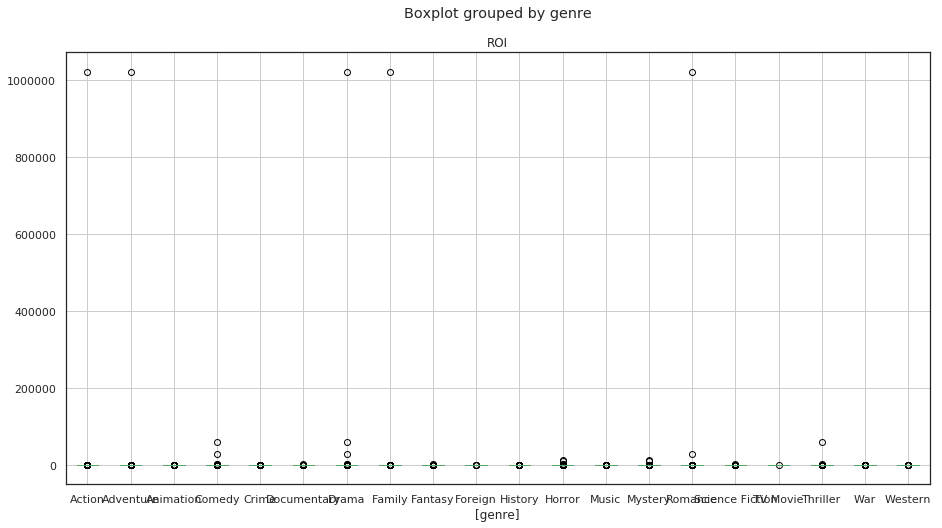

In [430]:
# create a box plot to see the distribution
df_genres2.boxplot(column=['ROI'], by=['genre'],figsize=(15,8));

This doesn't tell much about majority of records because of some outliers with ROI higher than 1 million! Let's see the median ROI by genre instead:

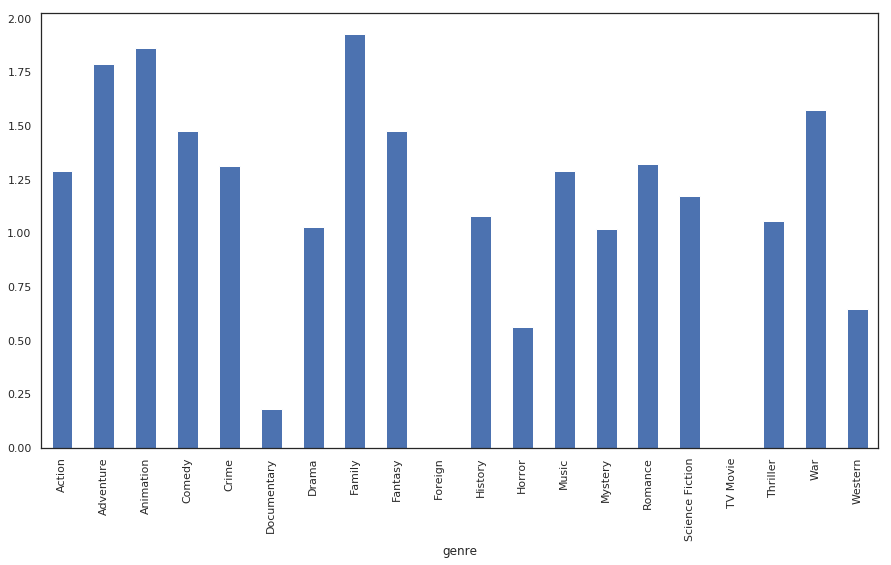

In [431]:
# create a bar chart of ROI by genre
df_genres2.groupby('genre').ROI.median().plot(kind='bar', figsize=(15,8));

Good, this tells more than the previous box plot. And as I suspected, the most popular genres are NOT the most profitable ones! Family has the highest revenue-budget ratio, and animation follows. Documentary, foreign, and TV movie are the least profitable, which might partially 
explain why the budgets for these genres are also the smallest. 

<a id='conclusions'></a>
## Conclusions
In this project, I have explored the movie data from the TMDb dataset regarding historical and seasonal changes in budget and revenue sizes, and relationship between genres and popularity and profitablity. Here are the recap of my findings:

**Budget and Revenue trends**
+ More than half of the movies in the dataset have 0 budget and/or 0 revenue.
+ The highest budgets of the year have been increased steadily since 1970s.
+ The maximum revenues have been around 1 billion (1e9) adjusted dollars since early 1990s, without some exceptions.
+ Unlike the budgets, there are some spikes in revenues in 1970s, such as 2.5B in 1977.
+ Within a year, budgets and revenues have 2 peak seasons: May to July and November to December. This trend aligns with when people take long-ish vacations (e.g. summer, Thanksgiving, Christmas).

**Genres and popularity/profitablity**
+ Adventure, fantasy, and sci-fi have the highest popularity score.  Documentary, foreign, and TV movie are the lowest. 
+ Popularity varies a lot between genres, while vote_average doesn't differ by genre as much as popularity does. 
+ The genres with high popularity don't always have high vote_average, and vice versa. Most notably, documentary has the lowest popularity among all yet the highest vote_average.
+ Documentary, foreign, and TV movie, the genres with the lowest popularity, are the smallest in terms of budget and revenue sizes, and are the least profitable.
+ The most popular genres are NOT the most profitable ones. Family has the highest revenue-budget ratio, and animation follows. 



In this analysis, I didn't conduct any statistical test, and the findings in this report are solely based on observations. The descriptions on correlations and causations, if any, are based on assumptions and not statistically significant. Also, this dataset is not perfect in the sense that more than half of observations presumably lack accurate numeric values of budgets and revenues. 